In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) - 1)*((np.exp(0.5*ln_q)))
    return x_val

data = pd.read_csv("./custom_func_data/6-points.csv")
data_4 = pd.read_csv("./custom_func_data/4-points.csv")
data3 = pd.read_csv("./custom_func_data/linear.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']
data['linear_interpolator'] = data3['xf']

In [4]:
data.drop('xf', axis = 1)

,lnx,lnq,6_point_interpolator,4_point_interpolator,linear_interpolator
0,-18.00,0.50,3.22610,3.22738,3.21703
1,-17.99,0.50,3.21828,3.21963,3.20954
2,-17.98,0.50,3.21040,3.21180,3.20198
3,-17.97,0.50,3.20246,3.20390,3.19435
4,-17.96,0.50,3.19447,3.19594,3.18663
...,...,...,...,...,...
341995,-0.05,9.95,-121.88000,-121.56700,-120.39400
341996,-0.04,9.95,-121.91500,-121.60300,-120.43100
341997,-0.03,9.95,-121.95100,-121.63900,-120.46900
341998,-0.02,9.95,-121.98700,-121.67500,-120.50600


In [5]:
data['actual_function'] = custom_func(data['lnx'],data['lnq'])

In [6]:
data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']
data['linear_ratio'] = data['linear_interpolator']/data['actual_function']

In [7]:
graphing = [data[i:i+1800].reset_index() for i in range(0,341999,1800)]

In [8]:
graphing

[      index    lnx  lnq        xf  6_point_interpolator  4_point_interpolator  \
 0         0 -18.00  0.5  3.226100              3.226100              3.227380   
 1         1 -17.99  0.5  3.218280              3.218280              3.219630   
 2         2 -17.98  0.5  3.210400              3.210400              3.211800   
 3         3 -17.97  0.5  3.202460              3.202460              3.203900   
 4         4 -17.96  0.5  3.194470              3.194470              3.195940   
 ...     ...    ...  ...       ...                   ...                   ...   
 1795   1795  -0.05  0.5 -0.860246             -0.860246             -0.860669   
 1796   1796  -0.04  0.5 -0.860672             -0.860672             -0.861095   
 1797   1797  -0.03  0.5 -0.861101             -0.861101             -0.861524   
 1798   1798  -0.02  0.5 -0.861532             -0.861532             -0.861955   
 1799   1799  -0.01  0.5 -0.861967             -0.861967             -0.862391   
 
       linear_

In [9]:
data2 = data.sort_values(['lnx','lnq'], ascending = True, ignore_index = True)
graphing2 = [data2[i:i+190].reset_index() for i in range(0,341999,190)]

**This pdf contains plots that compare the Fifth order interpolators to a linear interpolator. I included 8 pairs of plots for each type of interpolator, each pair containing a normal plot and a ratio plot**

**The grey lines at the bottom of each graph represent the points that were in the data that was used to interpolate**

# For the 6 point interpolator

## function vs lnx plots (global)

ln(q) is  6.3


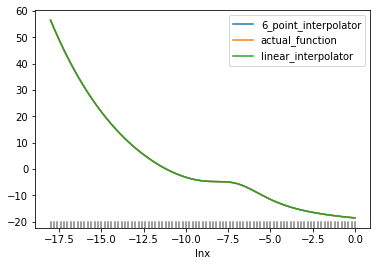

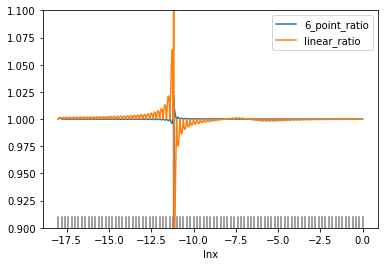

ln(q) is  9.8


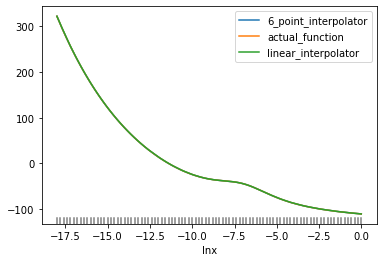

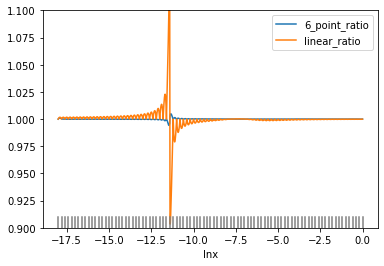

In [22]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        print("ln(q) is " , (dat['lnq'][0]))
        dat.plot(x ='lnx', y=['6_point_interpolator','actual_function','linear_interpolator'],)
#         plt.xlim(-15,-14.8)
#         if(dat['lnq'][0]==6.3):
#             plt.ylim(20,24)
#         else:
#             plt.ylim(112,122.5)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        dat.plot(x ='lnx', y=['6_point_ratio','linear_ratio'],)
#         plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        plt.ylim(0.9,1.1)
        plt.show()

## function vs lnx plots (in a small interval)

ln(q) is  6.3


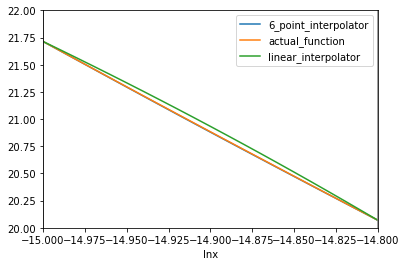

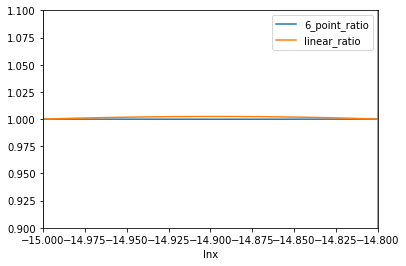

ln(q) is  9.8


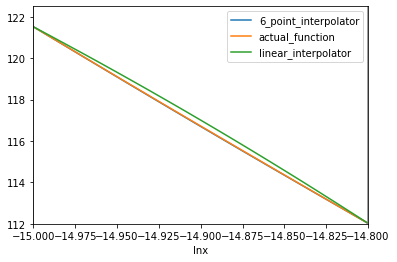

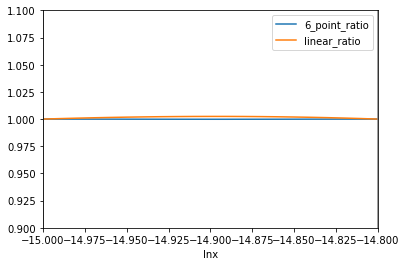

In [12]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        print("ln(q) is " , (dat['lnq'][0]))
        dat.plot(x ='lnx', y=['6_point_interpolator','actual_function','linear_interpolator'],)
        plt.xlim(-15,-14.8)
        if(dat['lnq'][0]==6.3):
            plt.ylim(20,22)
        else:
            plt.ylim(112,122.5)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        dat.plot(x ='lnx', y=['6_point_ratio','linear_ratio'],)
        plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        plt.ylim(0.9,1.1)
        plt.show()

## function vs lnq plots (Global)

ln(x) is  -17.8


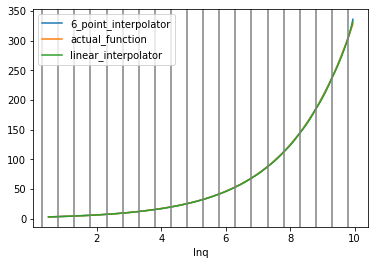

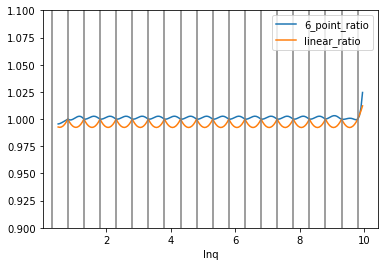

ln(x) is  -9.0


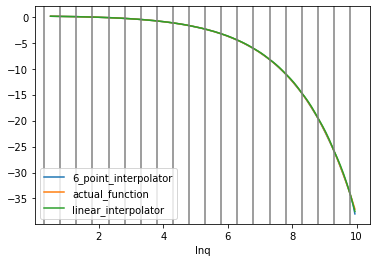

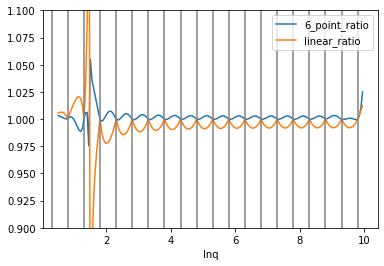

In [13]:
for dat in graphing2:
    i+=1
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        i=0
        print("ln(x) is " , (dat['lnx'][0]))
        dat.plot(x ='lnq', y=['6_point_interpolator','actual_function','linear_interpolator'],)
#         plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
#         if(dat['lnx'][0]==-17.8):
#             plt.ylim(5.8,7.5)
#         else:
#             plt.ylim(-0.17,-0.04)
        dat.plot(x ='lnq', y=['6_point_ratio','linear_ratio'],)
#         plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
        plt.ylim(0.9,1.1)
        plt.show()

## function vs lnq plots (in a small interval)

ln(x) is  -17.8


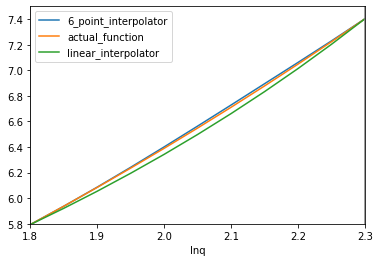

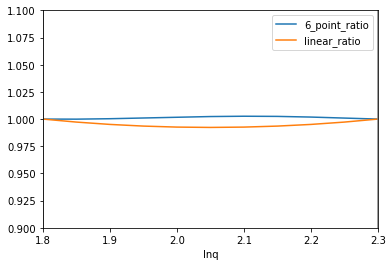

ln(x) is  -9.0


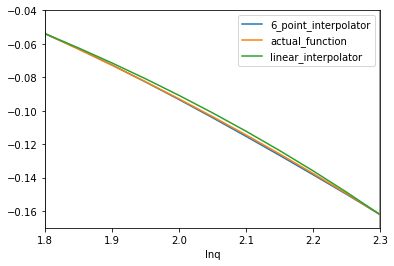

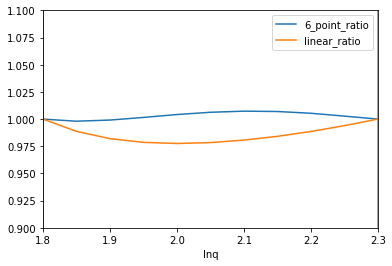

In [14]:
for dat in graphing2:
    i+=1
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        i=0
        print("ln(x) is " , (dat['lnx'][0]))
        dat.plot(x ='lnq', y=['6_point_interpolator','actual_function','linear_interpolator'],)
        plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
        if(dat['lnx'][0]==-17.8):
            plt.ylim(5.8,7.5)
        else:
            plt.ylim(-0.17,-0.04)
        dat.plot(x ='lnq', y=['6_point_ratio','linear_ratio'],)
        plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
        plt.ylim(0.9,1.1)
        plt.show()

# For the 4 point interpolator
## function vs lnx plots (global)

ln(q) is  6.3


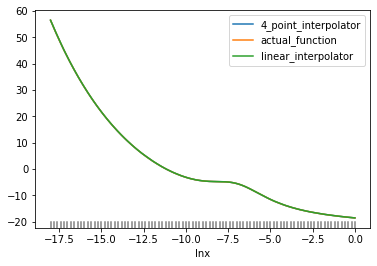

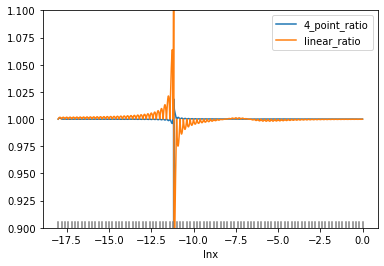

ln(q) is  9.8


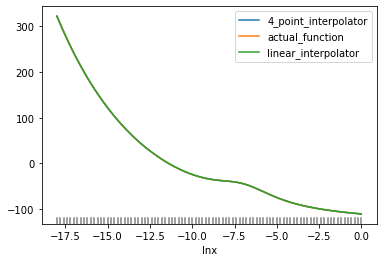

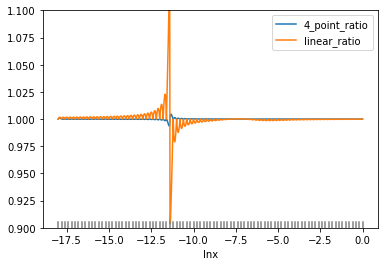

In [23]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        print("ln(q) is " , (dat['lnq'][0]))
        dat.plot(x ='lnx', y=['4_point_interpolator','actual_function','linear_interpolator'],)
#         plt.xlim(-15,-14.8)
#         if(dat['lnq'][0]==6.3):
#             plt.ylim(20,24)
#         else:
#             plt.ylim(112,122.5)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        dat.plot(x ='lnx', y=['4_point_ratio','linear_ratio'],)
#         plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
        plt.ylim(0.9,1.1)
        plt.show()

## function vs lnx plots (in a small interval)

ln(q) is  6.3


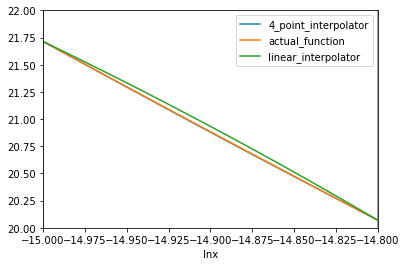

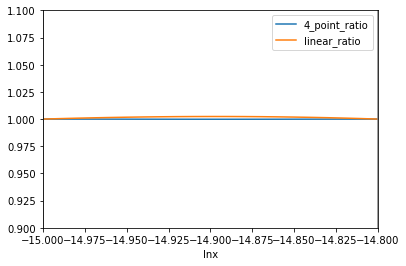

ln(q) is  9.8


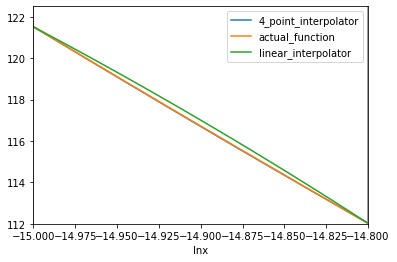

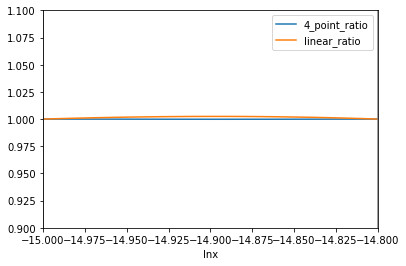

In [16]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        print("ln(q) is " , (dat['lnq'][0]))
        dat.plot(x ='lnx', y=['4_point_interpolator','actual_function','linear_interpolator'],)
        plt.xlim(-15,-14.8)
        if(dat['lnq'][0]==6.3):
            plt.ylim(20,22)
        else:
            plt.ylim(112,122.5)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.2
        dat.plot(x ='lnx', y=['4_point_ratio','linear_ratio'],)
        plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.2
        plt.ylim(0.9,1.1)
        plt.show()

## function vs lnq plots (Global)

ln(x) is  -17.8


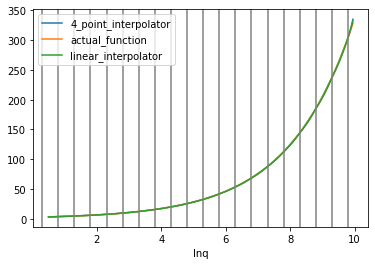

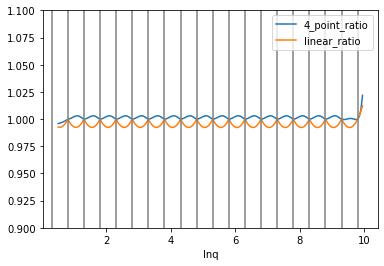

ln(x) is  -9.0


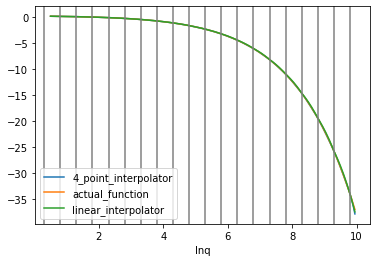

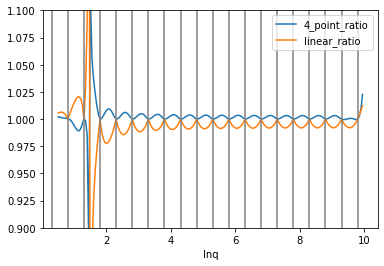

In [17]:
for dat in graphing2:
    i+=1
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        i=0
        print("ln(x) is " , (dat['lnx'][0]))
        dat.plot(x ='lnq', y=['4_point_interpolator','actual_function','linear_interpolator'],)
#         plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
#         if(dat['lnx'][0]==-17.8):
#             plt.ylim(5.8,7.5)
#         else:
#             plt.ylim(-0.17,-0.04)
        dat.plot(x ='lnq', y=['4_point_ratio','linear_ratio'],)
#         plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
        plt.ylim(0.9,1.1)
        plt.show()

## function vs lnq plots (in a small interval)

ln(x) is  -17.8


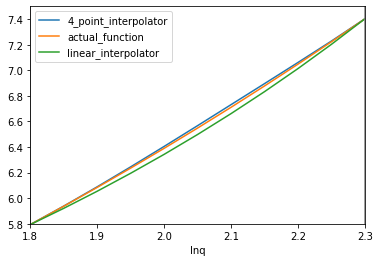

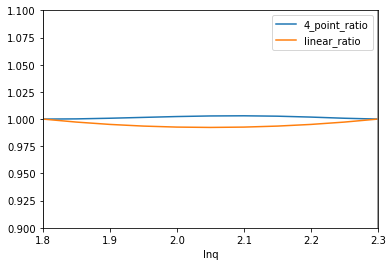

ln(x) is  -9.0


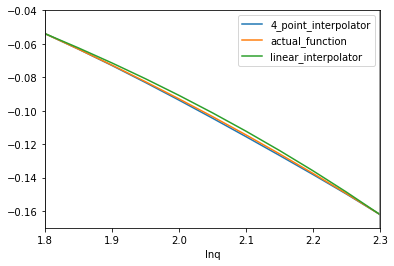

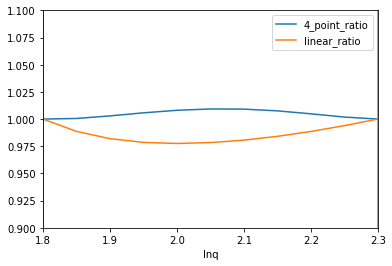

In [19]:
for dat in graphing2:
    i+=1
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        i=0
        print("ln(x) is " , (dat['lnx'][0]))
        dat.plot(x ='lnq', y=['4_point_interpolator','actual_function','linear_interpolator'],)
        plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
        if(dat['lnx'][0]==-17.8):
            plt.ylim(5.8,7.5)
        else:
            plt.ylim(-0.17,-0.04)
        dat.plot(x ='lnq', y=['4_point_ratio','linear_ratio'],)
        plt.xlim(1.8,2.3)
        i=0.3
        while(i<10):
            plt.axvline(x=i,ymax = 1,color='grey')
            i+=0.5
        plt.ylim(0.9,1.1)
        plt.show()